In [262]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hashlib

import json

#import marvel api keys
from api_keys import marvelpub_api_key
from api_keys import marvelpri_key

In [263]:

#Constructing the Hash
m = hashlib.md5()   #I'm assigning the method to the variable m.  Marvel requires md5 hashing

ts = str(time.time())   #This creates the time stamp as a string
ts_byte = bytes(ts, 'utf-8')  #This converts the timestamp into a byte 
m.update(ts_byte)  # I add the timestamp (in byte format) to the hash


private_key_byte = bytes(marvelpri_key, 'utf-8')
public_key_byte = bytes(marvelpub_api_key, 'utf-8')

m.update(private_key_byte) # I add api keys to the hash
m.update(public_key_byte)

hasht = m.hexdigest() # creating hash with ts, api keys (both)

#constructing the query
base_url = "https://gateway.marvel.com"  
api_key = marvelpub_api_key 
query_characters = "/v1/public/characters" +"?" 
query_comics = "/v1/public/comics" +"?"
query_creators = "/v1/public/creators" +"?"
query_events = "/v1/public/events" +"?"

#Building the actual query from the information above
character_url = base_url + query_characters +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(character_url)

#comics 
comics_url = base_url + query_comics +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(comics_url)

# creator
creators_url = base_url + query_creators +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(creators_url)

# events
events_url = base_url + query_events +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht
print(events_url)


#Making the API request and receiving info back as a json
characters_response = requests.get(character_url)
print(characters_response)


https://gateway.marvel.com/v1/public/characters?ts=1695317341.3880918&apikey=fb40911e1ded92f137e9397e0925a78e&hash=b5e522d4c79d4aa94216f98e6fb36702
https://gateway.marvel.com/v1/public/comics?ts=1695317341.3880918&apikey=fb40911e1ded92f137e9397e0925a78e&hash=b5e522d4c79d4aa94216f98e6fb36702
https://gateway.marvel.com/v1/public/creators?ts=1695317341.3880918&apikey=fb40911e1ded92f137e9397e0925a78e&hash=b5e522d4c79d4aa94216f98e6fb36702
https://gateway.marvel.com/v1/public/events?ts=1695317341.3880918&apikey=fb40911e1ded92f137e9397e0925a78e&hash=b5e522d4c79d4aa94216f98e6fb36702
<Response [200]>


In [264]:
def get_creator_df(offset='1'):
    creators_url = base_url + query_creators +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht+"&limit=100&offset="+offset
    creator_response = requests.get(creators_url)
    creators_data = json.loads(creator_response.text)
    creators_df = pd.DataFrame(creators_data['data']['results'])
    return creators_df
    

In [265]:
creator_df1 = get_creator_df('1')
creator_df2 = get_creator_df('2')
creator_df3 = get_creator_df('3')
creator_df4 = get_creator_df('4')
creator_df5 = get_creator_df('5')


In [266]:
creator_df = pd.concat([creator_df1,creator_df2,creator_df3,creator_df4,creator_df5]).reset_index()

creator_df.shape

(500, 15)

In [267]:
creators_df['comics_available'] = pd.DataFrame.from_records(creators_df['comics'])['available']

creators_df['series_available'] = pd.DataFrame.from_records(creators_df['series'])['available']

creators_df['stories_available'] = pd.DataFrame.from_records(creators_df['stories'])['available']

creators_df['events_available'] = pd.DataFrame.from_records(creators_df['events'])['available']
creators_df.head()

,id,firstName,middleName,lastName,suffix,fullName,modified,thumbnail,resourceURI,comics,series,stories,events,urls,comics_available,series_available,stories_available,events_available
99,4404,OlyOptics.Com,,,,OlyOptics.Com,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/4404,"{'available': 2, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 1, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",1,1,1,0
86,3044,Morgan,,,,Morgan,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/3044,"{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",1,1,1,0
12,6919,Beckett,,,,Beckett,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/6919,"{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",0,0,1,0
80,4755,Mettier,,,,Mettier,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/4755,"{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",1,1,1,0
20,3634,Buzz,,,,Buzz,2007-01-02T00:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/creators/3634,"{'available': 1, 'collectionURI': 'http://gate...","{'available': 1, 'collectionURI': 'http://gate...","{'available': 1, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",10,10,11,0


In [268]:
creators_df.index

Int64Index([99, 86, 12, 80, 20, 35, 55, 98, 51, 74, 17, 52, 40, 75, 54, 11, 46,
            88,  9, 47, 22, 29, 68, 84, 58, 64, 91, 85, 61,  2, 56,  4, 45, 72,
            21, 10, 62, 32, 39,  5, 15, 53, 23, 78, 77, 19, 60, 82, 18, 59, 36,
            67, 27, 13, 24, 65, 30,  0, 94,  1, 93, 63, 38, 42, 44, 33, 76, 71,
            69, 79, 66, 57, 25, 73, 14, 43, 90, 34, 48, 70, 49, 89, 83,  8, 26,
             7, 87, 81, 28, 92, 96, 41, 95, 16,  3, 50, 37, 31, 97,  6],
           dtype='int64')

In [269]:
creators_df['firstName'].values

array(['OlyOptics.Com', 'Morgan', 'Beckett', 'Mettier', 'Buzz',
       'Dr. Martin', 'Impacto', 'Olivetti', 'HiFi Colour', 'Malibu',
       'Blank', 'Homer', 'Fry', 'Malibu', 'Hoon', 'Beatty', 'Guru-eFX',
       'Muns', 'Balcells', 'Guru-eFX, Lee Duhig', 'Cafu', 'Colorgraphix',
       'Laz', 'More', 'Jg', 'Keng', 'N/A', 'More', 'Johnsons', 'A.R.K.',
       'Jc', 'ALSJOERDSMA', 'Gunji', 'Lopez', 'Caesar', 'Batt', 'Jr',
       'CRISSE', 'Flaviano', 'Arno', 'Bernet', 'Homs', 'Cameron',
       'McGray', 'Matthew', 'Brown', 'Jock', 'Moebius', 'Blond', 'Jl',
       'Drew', 'KylLs', 'ChrisCross', 'Bengal',
       'Chad Bowers & Chris Sims', 'Kf', 'Comicraft', '#O', 'Nichols',
       '#X', 'Ni', 'Kano', 'Enigma', 'Gantz', 'Geoffo', 'Derek', 'Mas',
       'Lombardia', 'Lazarelli', 'Method Man', 'KNIGHT AGENCY, INC.',
       'Jeffery', 'Charlamagne tha God', 'Low', 'Benjamin', 'GCW',
       'N.j.q.', 'Diverse Hands', 'GUSTAVO', 'Lazarus', 'Henkel',
       'N. Y. tribe', 'Moede', 'Balak', 'Chiya'

In [270]:
creators_df = creators_df.sort_values(by=['comics_available'],ascending=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


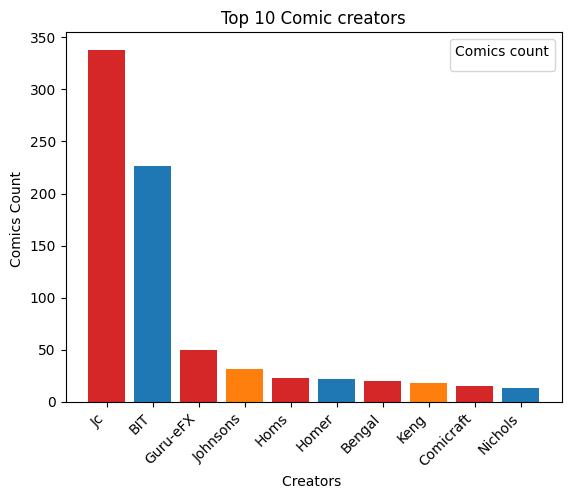

In [271]:


fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
comics_available_count = creators_df['comics_available'].values[:10]

ax.bar(x_labels, comics_available_count, color=bar_colors)

ax.set_xlabel('Creators ')
ax.set_ylabel('Comics Count ')
ax.set_title('Top 10 Comic creators')
ax.legend(title='Comics count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


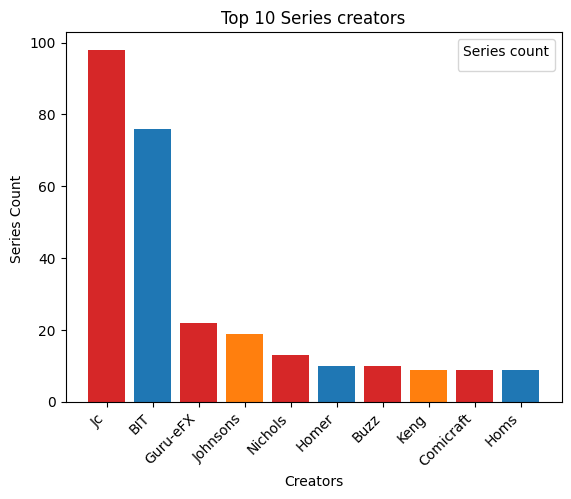

In [272]:
creators_df = creators_df.sort_values(by=['series_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
series_available_count = creators_df['series_available'].values[:10]

ax.bar(x_labels, series_available_count, color=bar_colors)

ax.set_xlabel('Creators')
ax.set_ylabel('Series Count ')
ax.set_title('Top 10 Series creators')
ax.legend(title='Series count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


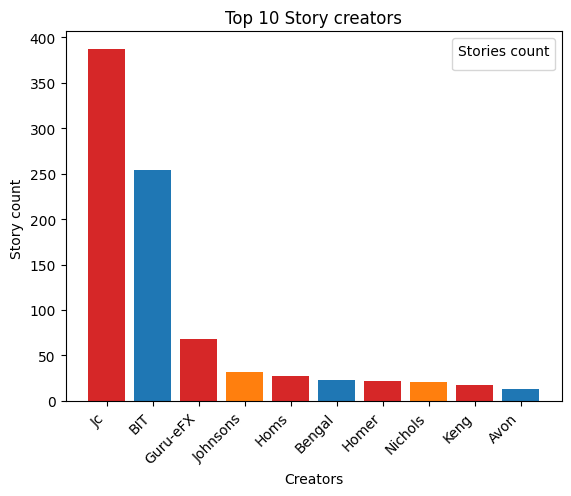

In [273]:
creators_df = creators_df.sort_values(by=['stories_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
stories_available_count = creators_df['stories_available'].values[:10]

ax.bar(x_labels, stories_available_count, color=bar_colors)

ax.set_xlabel('Creators')
ax.set_ylabel('Story count ')
ax.set_title('Top 10 Story creators')
ax.legend(title='Stories count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


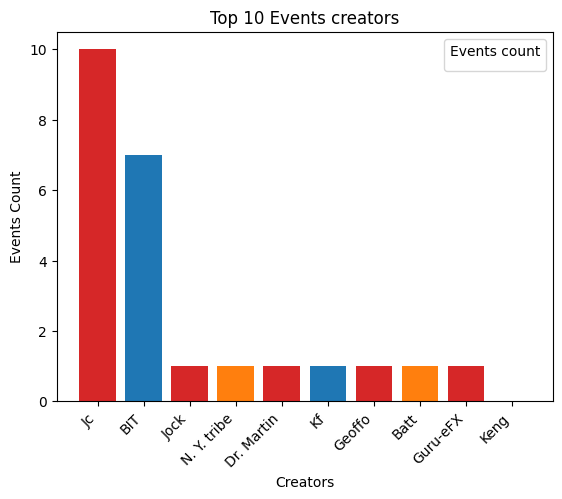

In [274]:
creators_df = creators_df.sort_values(by=['events_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = creators_df['fullName'].values[:10]
events_available_count = creators_df['events_available'].values[:10]

ax.bar(x_labels, events_available_count, color=bar_colors)

ax.set_xlabel('Creators')
ax.set_ylabel('Events Count')
ax.set_title('Top 10 Events creators')
ax.legend(title='Events count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [250]:
def get_character_df(offset='1'):
    character_url = base_url + query_characters +"ts=" + ts+ "&apikey=" + api_key + "&hash=" +hasht+"&limit=100&offset="+offset
    print(character_url)
    character_response = requests.get(character_url)
    character_data = json.loads(character_response.text)
    character_df = pd.DataFrame(character_data['data']['results'])
    return character_df
    

In [251]:
character_df1 = get_character_df('1')
character_df2 = get_character_df('2')
character_df3 = get_character_df('3')
character_df4 = get_character_df('4')
character_df5 = get_character_df('5')


https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=1
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=2
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=3
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=4
https://gateway.marvel.com/v1/public/characters?ts=1695258997.6594958&apikey=fb40911e1ded92f137e9397e0925a78e&hash=79de563771316b737de7109c0995fec5&limit=100&offset=5


In [252]:
character_df5.shape

(100, 11)

In [253]:
character_df = pd.concat([character_df1,character_df2,character_df3,character_df4,character_df5]).reset_index()
character_df.shape

(500, 12)

In [254]:
character_df.head()

,index,id,name,description,modified,thumbnail,resourceURI,comics,series,stories,events,urls
0,0,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18T15:54:04-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 7, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
1,1,1009144,A.I.M.,AIM is a terrorist organization bent on destro...,2013-10-17T14:41:30-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 53, 'collectionURI': 'http://gat...","{'available': 36, 'collectionURI': 'http://gat...","{'available': 57, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
2,2,1010699,Aaron Stack,,1969-12-31T19:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 14, 'collectionURI': 'http://gat...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
3,3,1009146,Abomination (Emil Blonsky),"Formerly known as Emil Blonsky, a spy of Sovie...",2012-03-20T12:32:12-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 55, 'collectionURI': 'http://gat...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 65, 'collectionURI': 'http://gat...","{'available': 1, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
4,4,1016823,Abomination (Ultimate),,2012-07-10T19:11:52-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 2, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."


In [255]:
character_df['comics'][0]

{'available': 4,
 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1017100/comics',
 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/47176',
   'name': 'FREE COMIC BOOK DAY 2013 1 (2013) #1'},
  {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/40632',
   'name': 'Hulk (2008) #53'},
  {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/40630',
   'name': 'Hulk (2008) #54'},
  {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/40628',
   'name': 'Hulk (2008) #55'}],
 'returned': 4}

In [256]:
character_df['comics_available'] = pd.DataFrame.from_records(character_df['comics'])['available']

character_df['series_available'] = pd.DataFrame.from_records(character_df['series'])['available']

character_df['stories_available'] = pd.DataFrame.from_records(character_df['stories'])['available']

character_df['events_available'] = pd.DataFrame.from_records(character_df['events'])['available']
character_df.head()

,index,id,name,description,modified,thumbnail,resourceURI,comics,series,stories,events,urls,comics_available,series_available,stories_available,events_available
0,0,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18T15:54:04-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 7, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",4,2,7,0
1,1,1009144,A.I.M.,AIM is a terrorist organization bent on destro...,2013-10-17T14:41:30-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 53, 'collectionURI': 'http://gat...","{'available': 36, 'collectionURI': 'http://gat...","{'available': 57, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",53,36,57,0
2,2,1010699,Aaron Stack,,1969-12-31T19:00:00-0500,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 14, 'collectionURI': 'http://gat...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",14,3,27,0
3,3,1009146,Abomination (Emil Blonsky),"Formerly known as Emil Blonsky, a spy of Sovie...",2012-03-20T12:32:12-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 55, 'collectionURI': 'http://gat...","{'available': 27, 'collectionURI': 'http://gat...","{'available': 65, 'collectionURI': 'http://gat...","{'available': 1, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",55,27,65,1
4,4,1016823,Abomination (Ultimate),,2012-07-10T19:11:52-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 2, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/...",2,2,3,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


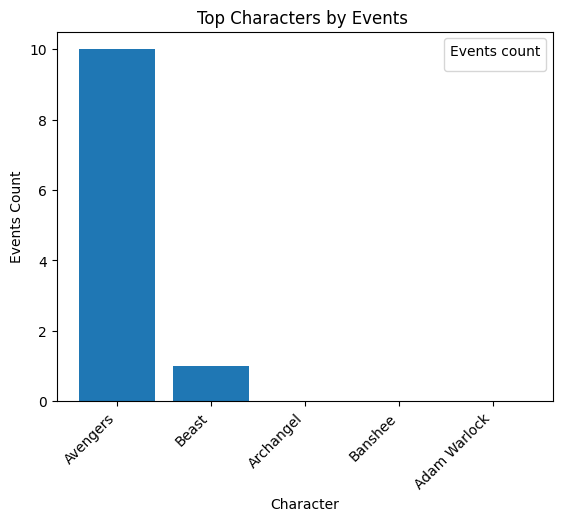

In [257]:
character_df = character_df.sort_values(by=['events_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = character_df['name'].values[:25]
events_available_count = creators_df['events_available'].values[:25]


ax.bar(x_labels, events_available_count)

ax.set_xlabel('Character')
ax.set_ylabel('Events Count')
ax.set_title('Top Characters by Events ')
ax.legend(title='Events count')
plt.xticks(rotation=45, ha='right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


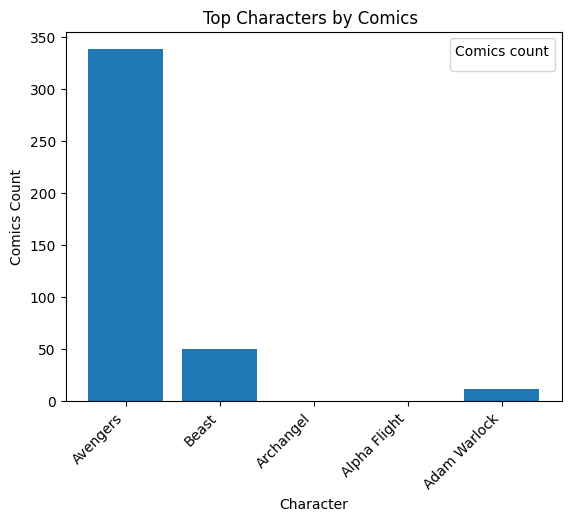

In [258]:
character_df = character_df.sort_values(by=['comics_available'],ascending=False)
fig, ax = plt.subplots()

x_labels = character_df['name'].values[:25]
comics_available_count = creators_df['comics_available'].values[:25]


ax.bar(x_labels, comics_available_count)

ax.set_xlabel('Character')
ax.set_ylabel('Comics Count')
ax.set_title('Top Characters by Comics ')
ax.legend(title='Comics count')
plt.xticks(rotation=45, ha='right')
plt.show()